# K-Means Loan Data 

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, k_means
import seaborn as sns



In [103]:
df = pd.read_excel("loan.xlsx")
df.head()


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [104]:
from sklearn.cluster import KMeans

In [105]:
df = df.drop(['Decision'],axis=1)

In [106]:
df

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0
5,F,16.080000,0.335,owner,given,unemploye,unemploye,0,1,f,given,160,126
6,M,23.170000,11.125,owner,given,professio,governmen,0,1,f,given,100,0
7,F,27.580000,3.000,owner,given,manager,private_s,2,1,t,given,280,10
8,F,19.170000,5.415,owner,given,guard_etc,governmen,0,0,f,given,80,484
9,F,27.250000,0.290,owner,given,manager,governmen,0,1,t,given,272,108


In [107]:
#investigate all the elwmwnts within each feature

for column in df:
    unique_val = np.unique(df[column])
    nr_values = len(unique_val)
    if nr_values<10:
        print('The number of values for the feature{}:{}--{}'.format(column,nr_values,unique_val))
    else:
        print('The number of values for the feature{}:{}'.format(column,nr_values))

        

The number of values for the featureSex:2--['F' 'M']
The number of values for the featureAge:274
The number of values for the featureTime_at_address:173
The number of values for the featureRes_status:2--['owner' 'rent']
The number of values for the featureTelephone:2--['given' 'not_given']
The number of values for the featureOccupation:12
The number of values for the featureJob_status:7--['governmen' 'military' 'private_s' 'retired' 'self_empl' 'student'
 'unemploye']
The number of values for the featureTime_employed:19
The number of values for the featureTime_bank:20
The number of values for the featureLiab_ref:2--['f' 't']
The number of values for the featureAcc_ref:2--['given' 'oth_inst_']
The number of values for the featureHome_Expn:126
The number of values for the featureBalance:171


In [108]:
df.columns


Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance'],
      dtype='object')

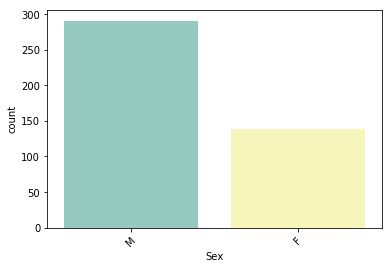

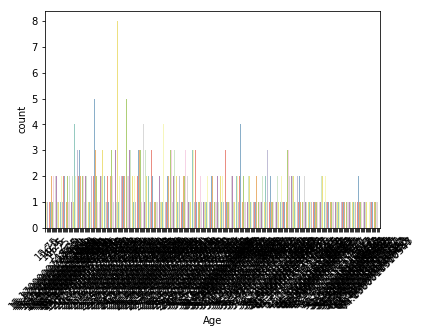

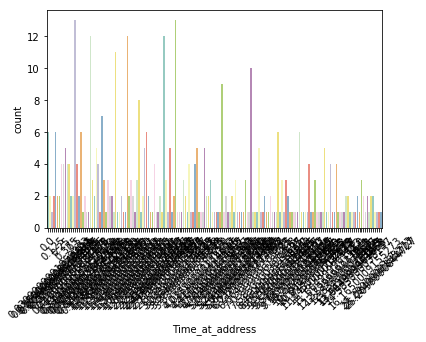

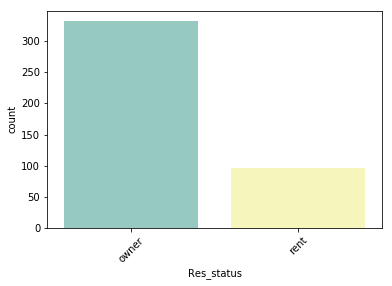

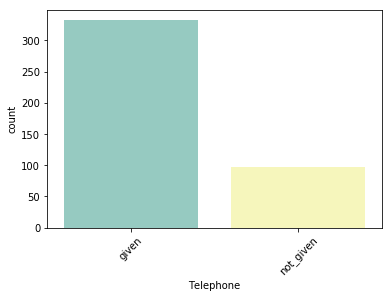

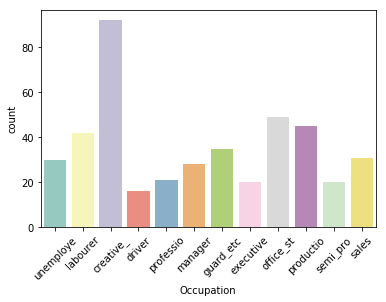

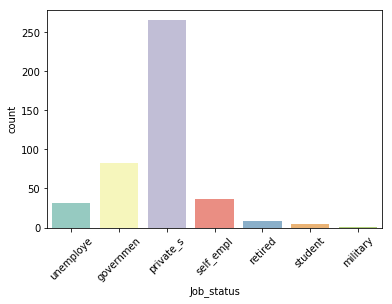

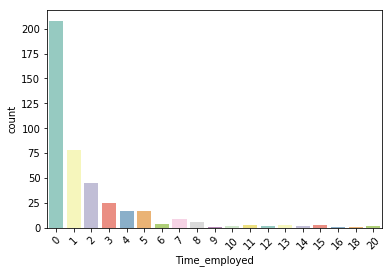

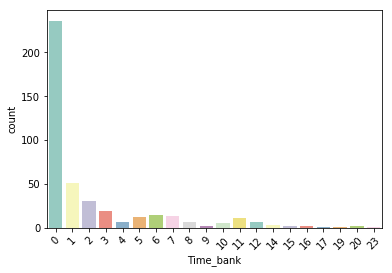

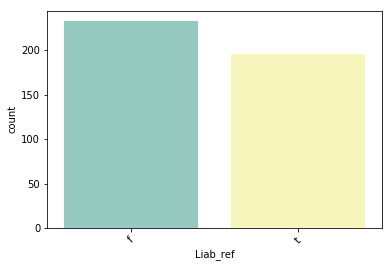

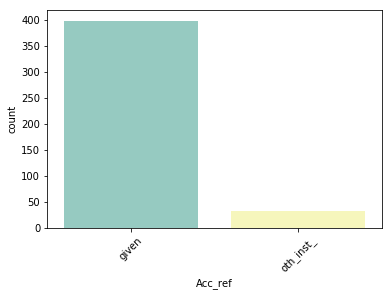

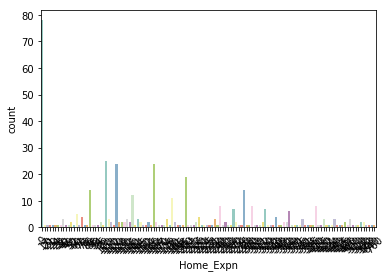

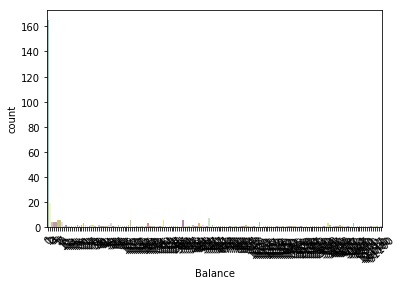

In [109]:
features =['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance']

for f in features:
    sns.countplot(x=f, data =df, palette ='Set3')
    plt.xticks(rotation=45)
    plt.show()

In [110]:
df_new =pd.get_dummies(df)

In [111]:
df_new

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
5,16.080000,0.335,0,1,160,126,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
6,23.170000,11.125,0,1,100,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7,27.580000,3.000,2,1,280,10,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
8,19.170000,5.415,0,0,80,484,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
9,27.250000,0.290,0,1,272,108,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [112]:
#kmeans clustering

X_train = df_new.values

#setting to 2 clusters

kmeans = KMeans(n_clusters=2,random_state=540)
kmeans= kmeans.fit(X_train)

#print clusters assignemd t each observation

print("The clusters are: ",kmeans.labels_)

#print inertia

print("The Inertia is: ",kmeans.inertia_)



#inertia is the within-cluster sum of squares criterion


The clusters are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The Inertia is:  1282765859.5850968


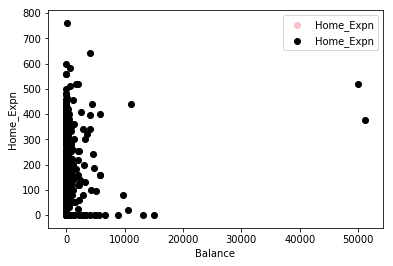

In [113]:



plt.scatter(df_new['Balance'],df_new['Home_Expn'],color='pink')
plt.scatter(df_new['Balance'],df_new['Home_Expn'],color='black')

plt.xlabel('Balance')
plt.ylabel('Home_Expn')
plt.legend()

In [114]:
#with decision

df = pd.read_excel("loan.xlsx")


In [115]:
df_1=pd.get_dummies(df)


In [116]:
df_1

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_,Decision_accept,Decision_reject
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,1
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
5,16.080000,0.335,0,1,160,126,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
6,23.170000,11.125,0,1,100,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0
7,27.580000,3.000,2,1,280,10,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
8,19.170000,5.415,0,0,80,484,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
9,27.250000,0.290,0,1,272,108,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1


In [117]:
#kmeans clustering

X_train1 = df_1.values

#setting to 2 clusters

kmeans = KMeans(n_clusters=2,random_state=540)
kmeans= kmeans.fit(X_train1)

#print clusters assignemd t each observation

print("The clusters are: ",kmeans.labels_)

#print inertia

print("The Inertia is: ",kmeans.inertia_)

The clusters are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The Inertia is:  1282766070.4984455


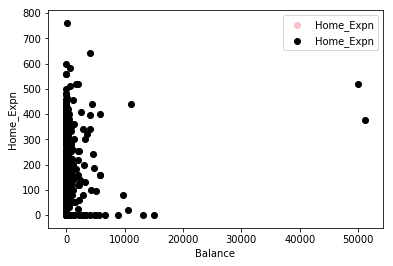

In [118]:
plt.scatter(df_1['Balance'],df_1['Home_Expn'],color='pink')
plt.scatter(df_1['Balance'],df_1['Home_Expn'],color='black')

plt.xlabel('Balance')
plt.ylabel('Home_Expn')
plt.legend()

# 1.Play data Hirerachical Clustering


In [122]:
#hirerachical clustering on play.xlsx
import pandas as pd
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial import distance
import seaborn as sb
import matplotlib as plt
from pylab import rcParams
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

data= pd.read_excel("play.xlsx")
data

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play
5,sunny,80,90,strong,dont_play
6,sunny,85,85,weak,dont_play
7,sunny,72,95,weak,dont_play
8,sunny,69,70,weak,play
9,rain,71,80,strong,dont_play


In [123]:
data1= pd.get_dummies(data)
data1

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak,Decision_dont_play,Decision_play
0,72,90,1,0,0,1,0,0,1
1,83,78,1,0,0,0,1,0,1
2,64,65,1,0,0,1,0,0,1
3,81,75,1,0,0,0,1,0,1
4,75,70,0,0,1,1,0,0,1
5,80,90,0,0,1,1,0,1,0
6,85,85,0,0,1,0,1,1,0
7,72,95,0,0,1,0,1,1,0
8,69,70,0,0,1,0,1,0,1
9,71,80,0,1,0,1,0,1,0


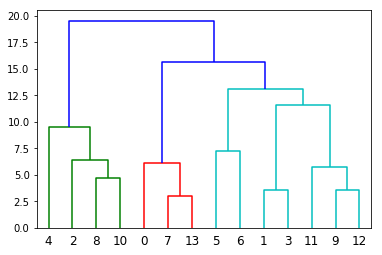

In [124]:

dendrogram = sch.dendrogram(sch.linkage(data1, method='average'))

In [125]:
data1.columns


Index(['Temperature', 'Humidity', 'Outlook_overcast', 'Outlook_rain',
       'Outlook_sunny', 'Windy_strong', 'Windy_weak', 'Decision_dont_play',
       'Decision_play'],
      dtype='object')

In [126]:
y_hc=  AgglomerativeClustering(n_clusters = 2, affinity ='euclidean', linkage='average')

In [127]:
y_hc= hc.fit_predict(data1)

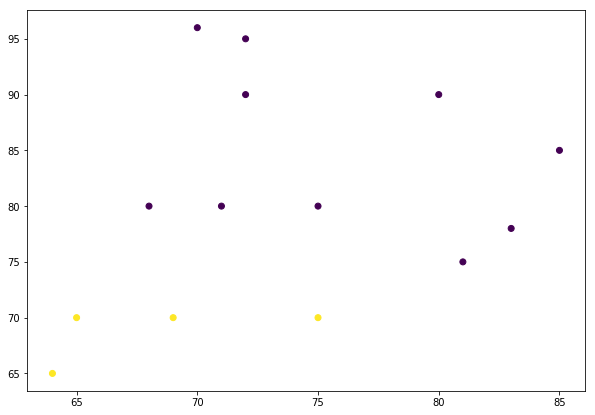

In [128]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['Temperature'], data1['Humidity'], c=hc.labels_) 

# 2.K-Means on Mycardata

In [129]:
df=pd.read_excel("mydata.xlsx")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Text(0,0.5,'MYDATA')

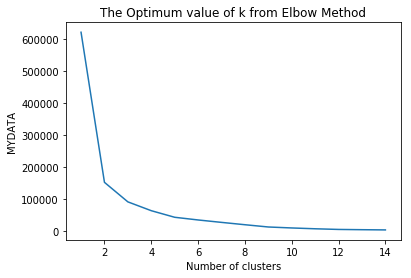

In [130]:
Z = df.iloc[:,1:12]
mydata=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(Z)
    mydata_iter = kmeans.inertia_
    mydata.append(mydata_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,mydata)
plt.title('The Optimum value of k from Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('MYDATA')

In [131]:
k_m = KMeans(n_clusters=5)
k_m

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [132]:
y_pred = k_m.fit_predict(df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']])
y_pred

array([0, 0, 2, 3, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 3,
       3, 1, 4, 2, 2, 2, 1, 0, 1, 2])

In [133]:
df['cluster']=y_pred
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


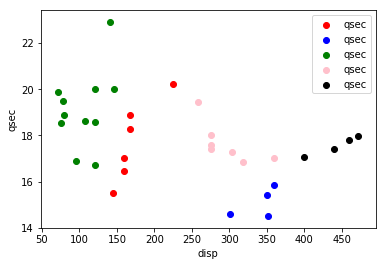

In [134]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]

plt.scatter(df0.disp,df0['qsec'],color='red')
plt.scatter(df1.disp,df1['qsec'],color='blue')
plt.scatter(df2.disp,df2['qsec'],color='green')
plt.scatter(df3.disp,df3['qsec'],color='pink')
plt.scatter(df4.disp,df4['qsec'],color='black')

plt.xlabel('disp')
plt.ylabel('qsec')
plt.legend()


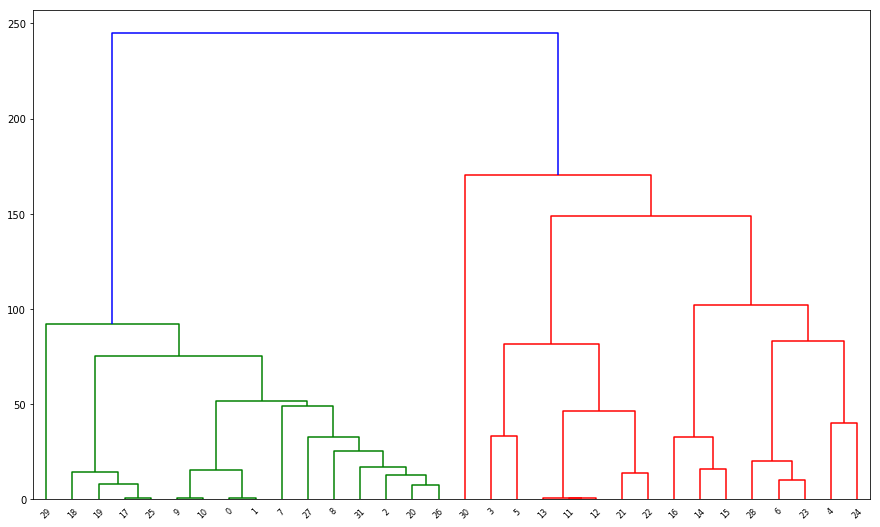

In [135]:
plt.figure(figsize=(15, 9))  

dendrogram = sch.dendrogram(sch.linkage(Z, method='average'))


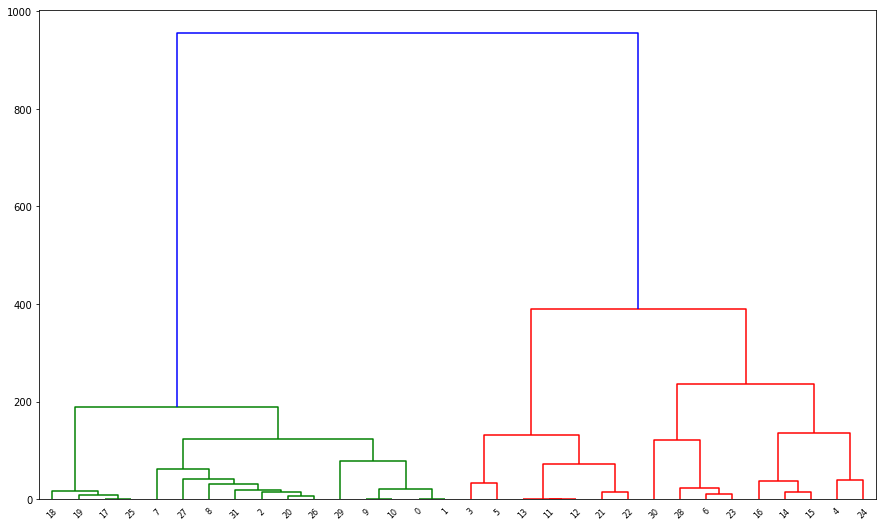

In [136]:
plt.figure(figsize=(15, 9))  

dendrogram = sch.dendrogram(sch.linkage(Z, method='ward'))


# 3. CIRCLE DATA

In [137]:
df = pd.read_excel("data.xlsx")
df


,xv,yv,class
0,5.000000e+00,0.003749,1
1,4.980973e+00,0.398928,1
2,4.924039e+00,0.593975,1
3,4.829629e+00,1.174262,1
4,4.698463e+00,1.769010,1
5,4.531539e+00,2.191050,1
6,4.330127e+00,2.258385,1
7,4.095760e+00,2.795147,1
8,3.830222e+00,2.888604,1
9,3.535534e+00,3.484238,1


In [138]:

circle = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
circle.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

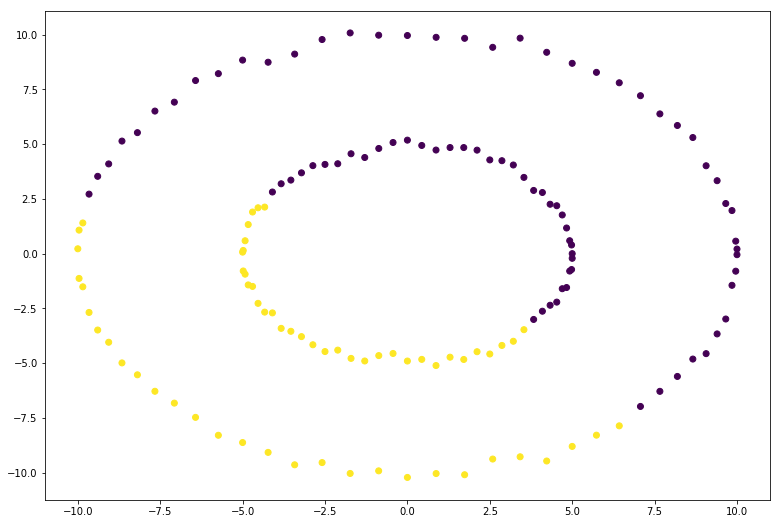

In [139]:
plt.figure(figsize=(13, 9))  
plt.scatter(df['xv'], df['yv'], c=circle.labels_) 

In [140]:

circle = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
circle.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

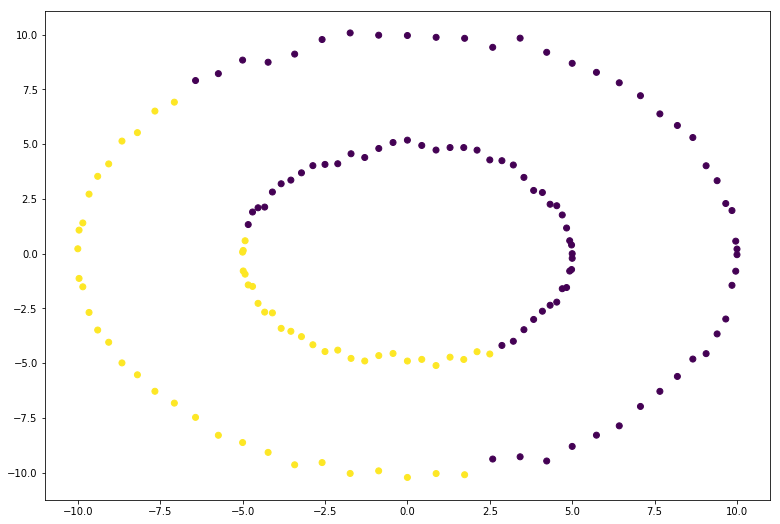

In [141]:
plt.figure(figsize=(13, 9))  
plt.scatter(df['xv'], df['yv'], c=circle.labels_) 

In [142]:

circle = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
circle.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

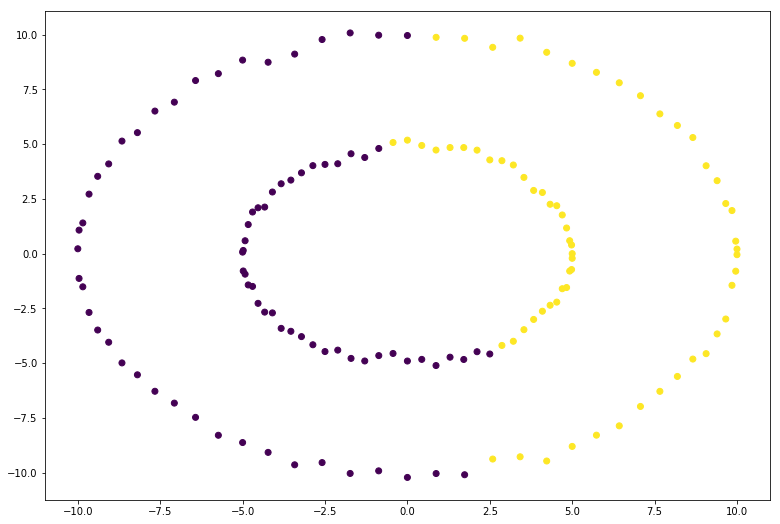

In [143]:
plt.figure(figsize=(13, 9))  
plt.scatter(df['xv'], df['yv'], c=circle.labels_) 

# 4. IRIS DATA

In [156]:
df = pd.read_excel("iris.xlsx")
df


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [157]:
df=pd.get_dummies(df)

In [158]:

Iris = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
Iris.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [159]:
df['Iris']=Iris.fit_predict(df)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,Iris
0,5.1,3.5,1.4,0.2,1,0,0,1
1,4.9,3.0,1.4,0.2,1,0,0,1
2,4.7,3.2,1.3,0.2,1,0,0,1
3,4.6,3.1,1.5,0.2,1,0,0,1
4,5.0,3.6,1.4,0.2,1,0,0,1


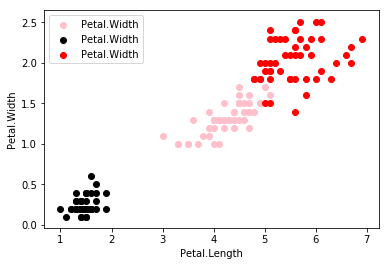

In [160]:
df0 = df[df.Iris==0]
df1 = df[df.Iris==1]
df2 = df[df.Iris==2]


plt.scatter(df0['Petal.Length'],df0['Petal.Width'],color='pink')
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],color='black')
plt.scatter(df2['Petal.Length'],df2['Petal.Width'],color='red')

plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()